# Deep Learning Project Work  
<a href="https://colab.research.google.com/drive/19gckz7UFFkyJzxICuoM94W5kU2IxMVra">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical, image_dataset_from_directory

In [2]:
# Downloading data from the MVTecAD database - Carpet and Hazelnut categories were used

!wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937545-1629951845/hazelnut.tar.xz
!wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937484-1629951672/carpet.tar.xz
!tar -xf hazelnut.tar.xz 
!tar -xf carpet.tar.xz

--2022-10-23 10:16:52--  https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937545-1629951845/hazelnut.tar.xz
Resolving www.mydrive.ch (www.mydrive.ch)... 91.214.169.64
Connecting to www.mydrive.ch (www.mydrive.ch)|91.214.169.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 617098680 (589M) [application/x-xz]
Saving to: ‘hazelnut.tar.xz’

hazelnut.tar.xz     100%[===================>] 588.51M  23.0MB/s    in 27s     

2022-10-23 10:17:19 (22.2 MB/s) - ‘hazelnut.tar.xz’ saved [617098680/617098680]

--2022-10-23 10:17:19--  https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937484-1629951672/carpet.tar.xz
Resolving www.mydrive.ch (www.mydrive.ch)... 91.214.169.64
Connecting to www.mydrive.ch (www.mydrive.ch)|91.214.169.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 740285760 (706M) [application/x-xz]
Saving to: ‘carpet.tar.xz’

carpet.tar.xz       100%[===================

In [3]:
# Splitting data into train and test sets

image_size = 256
num_classes = 2
batch_size = 256

train_ds_hazelnut = image_dataset_from_directory("/content/hazelnut/train/", 
                                        label_mode='categorical',
                                        image_size=(image_size, image_size),
                                        batch_size=batch_size)
test_ds_hazelnut = image_dataset_from_directory("/content/hazelnut/test/",
                                      label_mode='categorical',
                                      image_size=(image_size, image_size),
                                      batch_size=batch_size)
train_ds_carpet = image_dataset_from_directory("/content/carpet/train/", 
                                        label_mode='categorical',
                                        image_size=(image_size, image_size),
                                        batch_size=batch_size)
test_ds_carpet = image_dataset_from_directory("/content/carpet/test/",
                                      label_mode='categorical',
                                      image_size=(image_size, image_size),
                                      batch_size=batch_size)

Found 391 files belonging to 1 classes.
Found 110 files belonging to 5 classes.
Found 280 files belonging to 1 classes.
Found 117 files belonging to 6 classes.


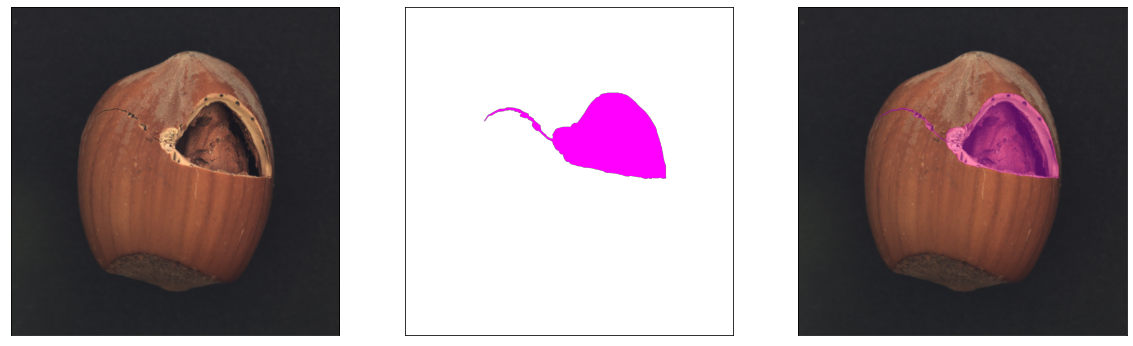

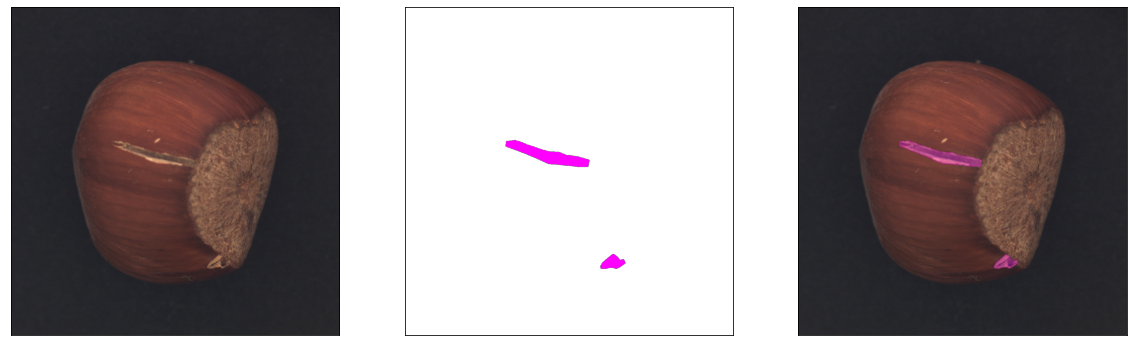

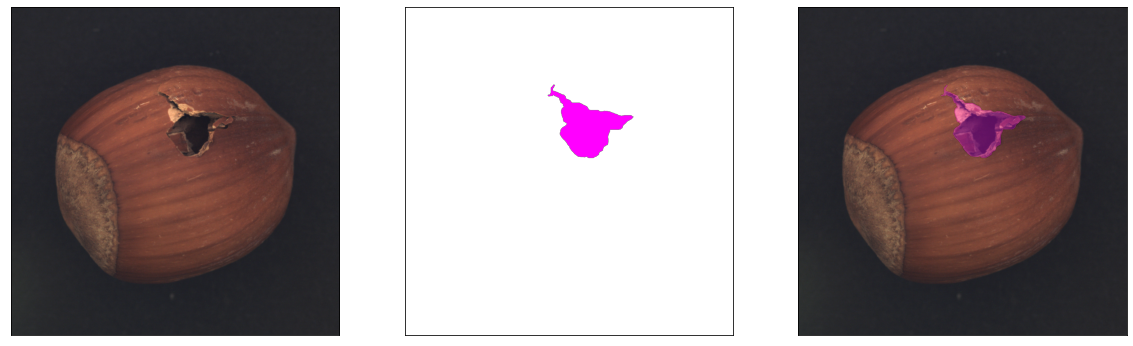

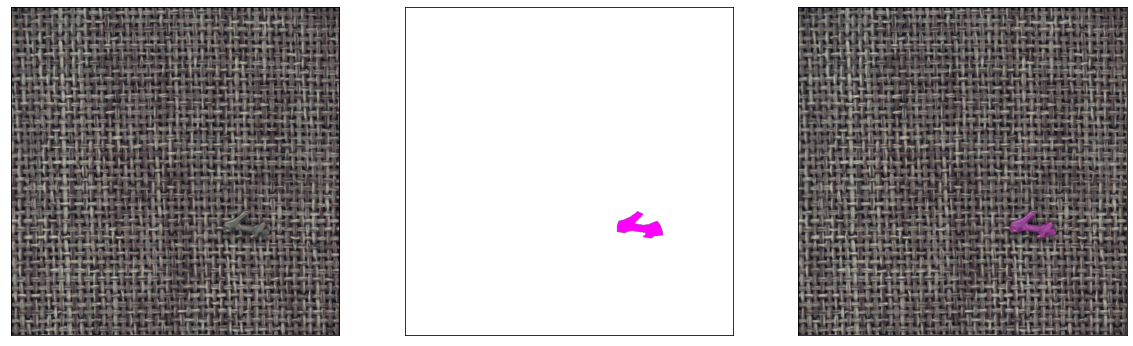

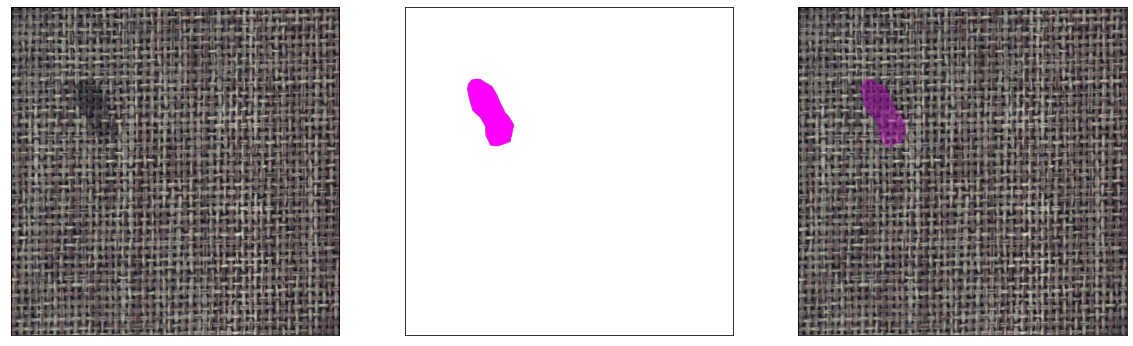

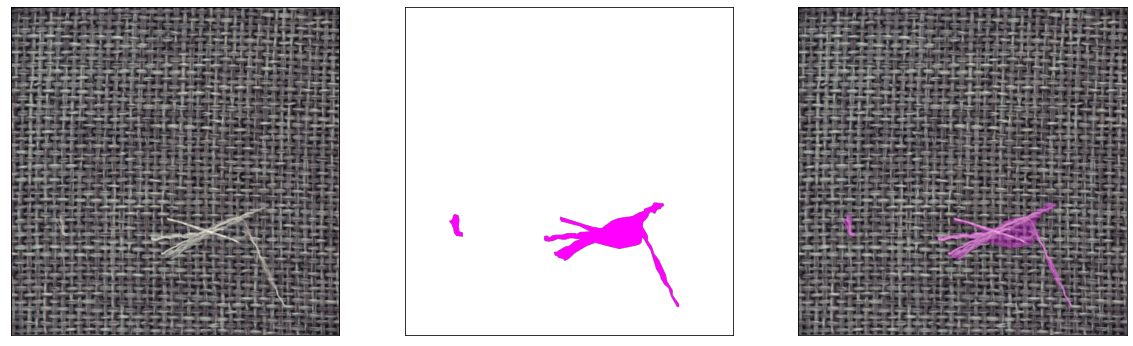

In [4]:
def test_image_visualization():

  image_paths = ['/content/hazelnut/test/crack/000.png','/content/hazelnut/test/cut/006.png',
                 '/content/hazelnut//test/hole/013.png','/content/carpet/test/metal_contamination/004.png',
                 '/content/carpet/test/color/005.png', '/content/carpet/test/thread/008.png']
  mask_paths = ['/content/hazelnut/ground_truth/crack/000_mask.png','/content/hazelnut/ground_truth/cut/006_mask.png',
                '/content/hazelnut/ground_truth/hole/013_mask.png','/content/carpet/ground_truth/metal_contamination/004_mask.png',
                '/content/carpet/ground_truth/color/005_mask.png', '/content/carpet/ground_truth/thread/008_mask.png']

  for i in range(0,len(image_paths)):

    msk = cv2.imread(str(mask_paths[i]))
    img = cv2.imread(str(image_paths[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    n_msk = mask_color_magenta(msk)
    plot_images(img, n_msk)
    
    
    
def plot_images(img, n_msk):

  plt.figure(figsize = (20,20))

  plt.subplot(131)
  plt.imshow(img)
  plt.xticks([]), plt.yticks([])

  plt.subplot(132)
  plt.imshow(n_msk)
  plt.xticks([]), plt.yticks([])

  plt.subplot(133)
  plt.imshow(img)
  plt.imshow(n_msk, alpha = 0.3)
  plt.xticks([]), plt.yticks([])
  
  plt.show()



def mask_color_magenta(img):
  # Modifies the original mask image - makes background transparent + sets the 
  # color of the segmented parts to magenta

  # separate R,G,B color channels and create a mask for the white pixels of the image
  mask = (img[:,:,0] == 255) & (img[:,:,1] == 255) & (img[:,:,2] == 255)
  # set the new color for white coloured pixels
  img[:,:,:3][mask] = [255,0,255] 
  # convert image to grayscale and "create a dimension for opacity"
  tmp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  _, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)
  # split image by color channels and append 4th 'opacity' dimension
  b, g, r = cv2.split(img)
  rgba = [b, g, r, alpha]
  n_img = cv2.merge(rgba, 4)

  return n_img

test_image_visualization()